# Assignment 9: Principal Component Analysis (PCA)

## Dataset: Wine Quality

**Topics Covered:**
- Dimensionality Reduction
- Variance Explained
- Visualization in reduced dimensions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load data
df = pd.read_csv('datasets/wine.csv')
print("Dataset loaded! Shape:", df.shape)
df.head()

Dataset loaded! Shape: (178, 14)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Type
0,13.02,5.33,2.25,13.7,88,2.70,1.17,0.40,2.56,11.53,0.52,3.05,1068,2
1,12.31,4.93,2.85,12.3,80,3.80,2.23,0.12,1.82,8.57,0.84,3.85,1144,3
2,13.02,4.87,3.09,20.7,100,2.23,4.80,0.37,1.45,3.04,0.75,1.61,1504,3
3,11.04,1.16,1.91,22.1,71,2.34,1.13,0.36,3.36,5.28,0.45,3.70,620,3
4,14.50,3.38,1.32,20.3,94,3.69,4.55,0.48,2.69,2.83,1.64,1.96,547,3


In [2]:
# Prepare data
# Separate features and target if applicable
X = df.select_dtypes(include=[np.number])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features scaled! Shape:", X_scaled.shape)

Features scaled! Shape: (178, 14)


In [3]:
# Apply PCA with all components
pca_full = PCA()
pca_full.fit(X_scaled)

# Explained variance ratio
explained_var = pca_full.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

print("=== Explained Variance ===")
for i in range(min(10, len(explained_var))):
    print("PC" + str(i+1) + ":", round(explained_var[i]*100, 2), "%  (Cumulative:", round(cumulative_var[i]*100, 2), "%)")

=== Explained Variance ===
PC1: 10.38 %  (Cumulative: 10.38 %)
PC2: 10.03 %  (Cumulative: 20.4 %)
PC3: 9.01 %  (Cumulative: 29.41 %)
PC4: 8.35 %  (Cumulative: 37.76 %)
PC5: 7.8 %  (Cumulative: 45.57 %)
PC6: 7.73 %  (Cumulative: 53.29 %)
PC7: 7.47 %  (Cumulative: 60.77 %)
PC8: 6.98 %  (Cumulative: 67.75 %)
PC9: 6.47 %  (Cumulative: 74.22 %)
PC10: 6.12 %  (Cumulative: 80.34 %)


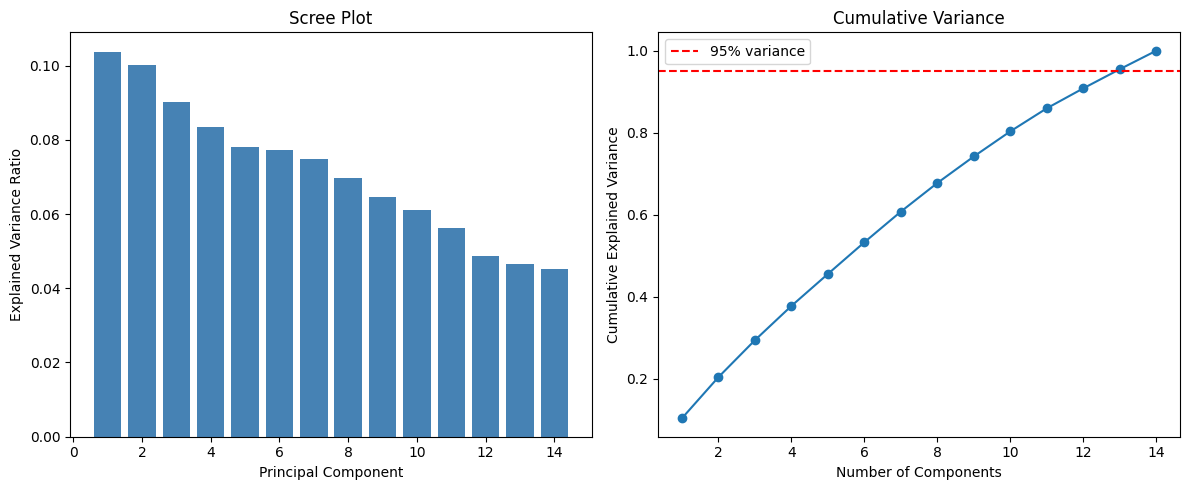

In [4]:
# Scree Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_var)+1), explained_var, color='steelblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance')
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
# Apply PCA with 2 components for visualization
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_scaled)

print("Original dimensions:", X_scaled.shape[1])
print("Reduced dimensions:", X_pca.shape[1])
print("Variance retained:", round(sum(pca_2d.explained_variance_ratio_)*100, 2), "%")

Original dimensions: 14
Reduced dimensions: 2
Variance retained: 20.4 %


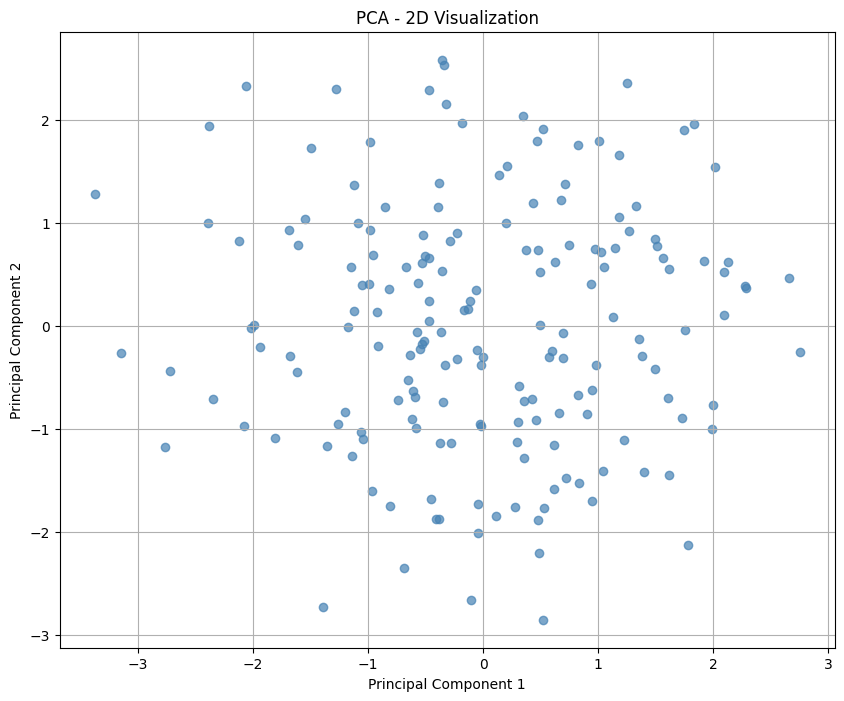

In [6]:
# Visualize in 2D
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, c='steelblue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Visualization')
plt.grid(True)
plt.show()

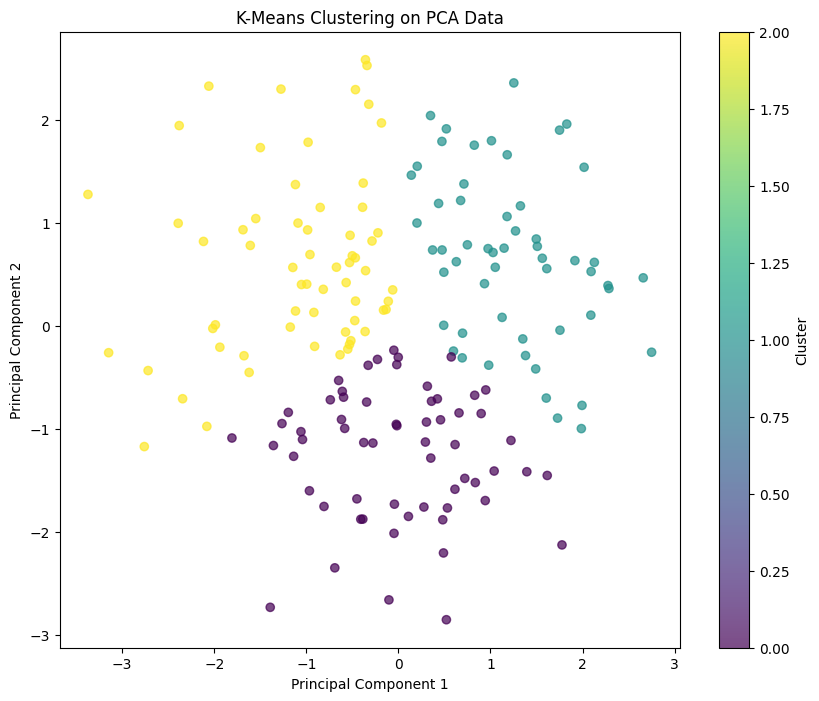

In [7]:
# Clustering on PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA Data')
plt.colorbar(label='Cluster')
plt.show()

## Summary

**Key Findings:**
- PCA reduced high-dimensional data to 2 components
- First few components capture most variance
- Visualization reveals data structure